In [9]:
import os
import statistics
from typing import Dict, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def load_csv_results():
    normal_datasets = ["healthcare", "folktables", "cardio", "reviews"]
    image_dataset = ["sneakers"]
    data_loadings = ["fast_loading", "slow_loading"]
    featurizations = ["featurization_0", "featurization_1", "featurization_2", "featurization_3", "featurization_4"]
    models = ["logistic_regression", "xgboost", "neural_network"]
    result_df = None
    for dataset in normal_datasets:
        for data_loading in data_loadings:
            for featurization in featurizations:
                for model in models:
                    filepath = f"{os.getcwd()}/instrumentation-benchmark-results/" \
                               f"results-instrumentation-{dataset}-{data_loading}-{featurization}-{model}.csv"
                    new_df = pd.read_csv(filepath)
                    new_df['median_total_exec_duration_with_instrum_with_tracking'] = new_df['total_exec_duration_with_instrum_with_tracking'].median()
                    new_df['median_total_exec_duration_with_instrum_without_tracking'] = new_df['total_exec_duration_with_instrum_without_tracking'].median()
                    new_df['median_total_exec_duration_without_instrum_main_func'] = new_df['total_exec_duration_without_instrum_main_func'].median()
                    new_df['median_total_exec_duration_without_instrum_load_ast_compile'] = new_df['total_exec_duration_without_instrum_load_ast_compile'].median()
                    new_df['median_overhead_with_tracking_vs_main_func'] = new_df['median_total_exec_duration_with_instrum_with_tracking'] - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df['median_overhead_without_tracking_vs_main_func'] = new_df['median_total_exec_duration_with_instrum_without_tracking'] - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df['instrum_with_tracking_original_pipeline_estimated'] = new_df['instrum_with_tracking_original_pipeline_estimated'].median()
                    new_df['tracking_diff_of_measurement'] = new_df['instrum_with_tracking_original_pipeline_estimated'].median() - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df = new_df[['median_total_exec_duration_with_instrum_with_tracking',
                                     'median_total_exec_duration_with_instrum_without_tracking',
                                     'median_total_exec_duration_without_instrum_main_func',
                                     'median_total_exec_duration_without_instrum_load_ast_compile',
                                     'median_overhead_with_tracking_vs_main_func',
                                     'median_overhead_without_tracking_vs_main_func',
                                     'tracking_diff_of_measurement',
                                     'instrum_with_tracking_original_pipeline_estimated',
                                     'dataset', 'data_loading', 'featurization', 'model']]
                    new_df = new_df.head(1)
                    new_df = new_df.round(2)
                    if result_df is None:
                        result_df = new_df
                    else:
                        result_df = pd.concat([result_df, new_df], axis=0)
    for dataset in image_dataset:
        for data_loading in data_loadings:
            for featurization in ["image"]:
                for model in ["image"]:
                    filepath = f"{os.getcwd()}/instrumentation-benchmark-results/" \
                               f"results-instrumentation-{dataset}-{data_loading}-{featurization}-{model}.csv"
                    new_df = pd.read_csv(filepath)
                    new_df['median_total_exec_duration_with_instrum_with_tracking'] = new_df['total_exec_duration_with_instrum_with_tracking'].median()
                    new_df['median_total_exec_duration_with_instrum_without_tracking'] = new_df['total_exec_duration_with_instrum_without_tracking'].median()
                    new_df['median_total_exec_duration_without_instrum_main_func'] = new_df['total_exec_duration_without_instrum_main_func'].median()
                    new_df['median_total_exec_duration_without_instrum_load_ast_compile'] = new_df['total_exec_duration_without_instrum_load_ast_compile'].median()
                    new_df['median_overhead_with_tracking_vs_main_func'] = new_df['median_total_exec_duration_with_instrum_with_tracking'] - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df['median_overhead_without_tracking_vs_main_func'] = new_df['median_total_exec_duration_with_instrum_without_tracking'] - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df['instrum_with_tracking_original_pipeline_estimated'] = new_df['instrum_with_tracking_original_pipeline_estimated'].median()
                    new_df['tracking_diff_of_measurement'] = new_df['instrum_with_tracking_original_pipeline_estimated'].median() - new_df['median_total_exec_duration_without_instrum_main_func']
                    new_df = new_df[['median_total_exec_duration_with_instrum_with_tracking',
                                     'median_total_exec_duration_with_instrum_without_tracking',
                                     'median_total_exec_duration_without_instrum_main_func',
                                     'median_total_exec_duration_without_instrum_load_ast_compile',
                                     'median_overhead_with_tracking_vs_main_func',
                                     'median_overhead_without_tracking_vs_main_func',
                                     'tracking_diff_of_measurement',
                                     'instrum_with_tracking_original_pipeline_estimated',
                                     'dataset', 'data_loading', 'featurization', 'model']]
                    new_df = new_df.head(1)
                    new_df = new_df.round(2)
                    if result_df is None:
                        result_df = new_df
                    else:
                        result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

In [11]:
median_results = load_csv_results()

In [12]:
median_results_ordered_by_median_overhead = median_results\
    .sort_values(by=['median_overhead_with_tracking_vs_main_func'])
median_results_ordered_by_median_overhead.to_csv(
    f"{os.getcwd()}/instrumentation-benchmark-results/instrumentation_overhead_overview_ordered_by_median_overhead.csv",
    index=True)
median_results_ordered_by_median_overhead

,median_total_exec_duration_with_instrum_with_tracking,median_total_exec_duration_with_instrum_without_tracking,median_total_exec_duration_without_instrum_main_func,median_total_exec_duration_without_instrum_load_ast_compile,median_overhead_with_tracking_vs_main_func,median_overhead_without_tracking_vs_main_func,tracking_diff_of_measurement,instrum_with_tracking_original_pipeline_estimated,dataset,data_loading,featurization,model
0,40273.49,40061.89,40480.05,40040.75,-206.56,-418.16,-534.74,39945.31,reviews,slow_loading,featurization_2,xgboost
0,1406.85,1292.21,1277.94,1287.45,128.92,14.27,-25.55,1252.39,folktables,fast_loading,featurization_0,logistic_regression
0,4134.42,4017.90,3993.18,4000.57,141.24,24.72,-12.30,3980.88,folktables,fast_loading,featurization_0,xgboost
0,4357.17,4242.35,4215.60,4229.44,141.57,26.75,-10.52,4205.07,sneakers,slow_loading,image,image
0,4168.54,4032.93,4024.62,4027.93,143.92,8.31,-5.86,4018.76,sneakers,fast_loading,image,image
...,...,...,...,...,...,...,...,...,...,...,...,...
0,9449.53,8964.68,8872.12,8873.46,577.41,92.56,213.25,9085.37,reviews,fast_loading,featurization_3,logistic_regression
0,9914.10,9396.70,9316.06,9336.65,598.04,80.64,214.15,9530.21,reviews,slow_loading,featurization_3,logistic_regression
0,42947.08,42423.29,42345.77,42352.85,601.31,77.52,193.85,42539.62,reviews,fast_loading,featurization_3,xgboost
0,16348.33,15770.20,15688.56,15753.52,659.76,81.64,260.84,15949.40,reviews,slow_loading,featurization_3,neural_network


In [13]:
def overhead_box_plot(data, title, with_outliers):
    fig, ax = plt.subplots()

    data_set_row_count_map = {
        'healthcare': 'healthcare\n(#887)',
        'sneakers': 'sneakers\n(#6000)',
        'folktables': 'folktables\n(#29237)',
        'cardio': 'cardio\n(#70000)',
        'reviews': 'reviews\n(#100000)',
    }

    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)


    for group_index, dataset in enumerate(data_set_row_count_map.keys()):
        filtered_data = data[data["dataset"] == dataset]
        y1 = filtered_data['median_overhead_with_tracking_vs_main_func']
        y2 = filtered_data['median_overhead_without_tracking_vs_main_func']
        position = group_index * 3
        box_left = plt.boxplot([y1], positions=[position + 1], widths=0.6, showfliers=with_outliers)
        box_right = plt.boxplot([y2], positions=[position + 2], widths=0.6, showfliers=with_outliers)
        set_box_color(box_left, 'tab:orange')
        set_box_color(box_right, 'tab:blue')
    # ax.legend(fontsize=15, ncol=1)
    # ax.grid(True)
    plt.gca().yaxis.grid(True, linestyle='-.')
    plt.ylabel('instrum. overhead [ms]', fontsize=20)
    if with_outliers is False:
        plt.ylim(0, None)
    # plt.xlabel('# rows', fontsize=26)
    # plt.xlim(0, 45)
    ax.set_xticks([1.5, 4.5, 7.5, 10.5, 13.5])
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticklabels(data_set_row_count_map.values(), fontsize=18)

    plt.plot([], c='tab:orange', label='tracking')
    plt.plot([], c='tab:blue', label='no track.')
    plt.legend(fontsize=15)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

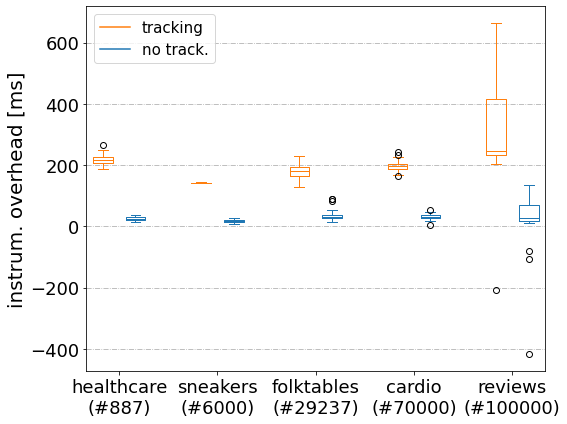

In [14]:
# With outliers
overhead_box_plot(median_results, 'overhead_per_dataset_with_outliers', True)

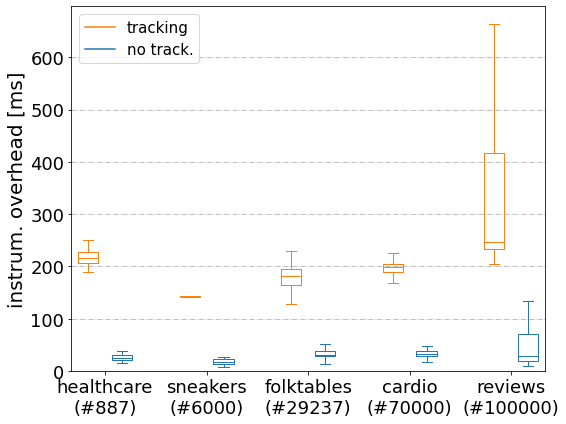

In [15]:
# Without outliers
overhead_box_plot(median_results, 'overhead_per_dataset_without_outliers', False)

In [16]:
median_results_ordered_by_median_overhead = median_results\
    .sort_values(by=['dataset', 'model', 'data_loading', 'median_total_exec_duration_without_instrum_main_func'])
median_results_ordered_by_median_overhead.to_csv(
    f"{os.getcwd()}/instrumentation-benchmark-results/find_featurization_cost_order.csv",
    index=True)
median_results_ordered_by_median_overhead

,median_total_exec_duration_with_instrum_with_tracking,median_total_exec_duration_with_instrum_without_tracking,median_total_exec_duration_without_instrum_main_func,median_total_exec_duration_without_instrum_load_ast_compile,median_overhead_with_tracking_vs_main_func,median_overhead_without_tracking_vs_main_func,tracking_diff_of_measurement,instrum_with_tracking_original_pipeline_estimated,dataset,data_loading,featurization,model
0,502.53,344.09,312.21,317.68,190.32,31.89,-5.72,306.49,cardio,fast_loading,featurization_2,logistic_regression
0,482.15,342.10,312.99,319.04,169.16,29.11,-4.82,308.16,cardio,fast_loading,featurization_0,logistic_regression
0,559.29,387.54,358.55,364.22,200.74,28.99,-7.49,351.07,cardio,fast_loading,featurization_3,logistic_regression
0,940.76,775.60,730.59,736.84,210.17,45.01,-10.63,719.96,cardio,fast_loading,featurization_4,logistic_regression
0,965.88,807.36,769.39,775.48,196.48,37.96,-3.91,765.48,cardio,fast_loading,featurization_1,logistic_regression
...,...,...,...,...,...,...,...,...,...,...,...,...
0,22291.47,21912.46,21993.35,21985.95,298.11,-80.90,-129.97,21863.38,reviews,slow_loading,featurization_4,xgboost
0,40273.49,40061.89,40480.05,40040.75,-206.56,-418.16,-534.74,39945.31,reviews,slow_loading,featurization_2,xgboost
0,43426.46,42908.58,42858.68,42839.49,567.77,49.90,164.44,43023.13,reviews,slow_loading,featurization_3,xgboost
0,4168.54,4032.93,4024.62,4027.93,143.92,8.31,-5.86,4018.76,sneakers,fast_loading,image,image


In [26]:
print(f"all datasets: max pipeline runtime without mlwhatif: {median_results['median_total_exec_duration_without_instrum_main_func'].max()}")
print(f"all datasets: max overhead with tracking: {median_results['median_overhead_with_tracking_vs_main_func'].max()}")
print(f"all datasets: max overhead without tracking: {median_results['median_overhead_without_tracking_vs_main_func'].max()}")
print()

print(f"all datasets: p95 pipeline runtime without mlwhatif: {median_results['median_total_exec_duration_without_instrum_main_func'].quantile(.95)}")
print(f"all datasets: p95 overhead with tracking: {median_results['median_overhead_with_tracking_vs_main_func'].quantile(.95)}")
print(f"all datasets: p95 overhead without tracking: {median_results['median_overhead_without_tracking_vs_main_func'].quantile(.95)}")
print()

print(f"all datasets: p90 pipeline runtime without mlwhatif: {median_results['median_total_exec_duration_without_instrum_main_func'].quantile(.9)}")
print(f"all datasets: p90 overhead with tracking: {median_results['median_overhead_with_tracking_vs_main_func'].quantile(.9)}")
print(f"all datasets: p90 overhead without tracking: {median_results['median_overhead_without_tracking_vs_main_func'].quantile(.9)}")
print()

print(f"all datasets: median pipeline runtime without mlwhatif: {median_results['median_total_exec_duration_without_instrum_main_func'].median()}")
print(f"all datasets: median overhead with tracking: {median_results['median_overhead_with_tracking_vs_main_func'].median()}")
print(f"all datasets: median overhead without tracking: {median_results['median_overhead_without_tracking_vs_main_func'].median()}")
print()

print(f"all datasets: min pipeline runtime without mlwhatif: {median_results['median_total_exec_duration_without_instrum_main_func'].min()}")
print(f"all datasets: min overhead with tracking: {median_results['median_overhead_with_tracking_vs_main_func'].min()}")
print(f"all datasets: min overhead without tracking: {median_results['median_overhead_without_tracking_vs_main_func'].min()}")
print()

all datasets: max pipeline runtime without mlwhatif: 42858.68
all datasets: max overhead with tracking: 664.4
all datasets: max overhead without tracking: 133.62

all datasets: p95 pipeline runtime without mlwhatif: 15664.573499999995
all datasets: p95 overhead with tracking: 510.05699999999894
all datasets: p95 overhead without tracking: 83.86299999999999

all datasets: p90 pipeline runtime without mlwhatif: 9873.457000000002
all datasets: p90 overhead with tracking: 269.995
all datasets: p90 overhead without tracking: 52.22600000000001

all datasets: median pipeline runtime without mlwhatif: 2245.92
all datasets: median overhead with tracking: 207.85000000000002
all datasets: median overhead without tracking: 29.625

all datasets: min pipeline runtime without mlwhatif: 229.29
all datasets: min overhead with tracking: -206.56
all datasets: min overhead without tracking: -418.16



In [27]:
without_reviews = median_results[median_results['dataset'] != "reviews"]
print(f"without reviews: max pipeline runtime without mlwhatif: {without_reviews['median_total_exec_duration_without_instrum_main_func'].max()}")
print(f"without reviews: max overhead with tracking: {without_reviews['median_overhead_with_tracking_vs_main_func'].max()}")
print(f"without reviews: max overhead without tracking: {without_reviews['median_overhead_without_tracking_vs_main_func'].max()}")
print()

print(f"without reviews: p95 pipeline runtime without mlwhatif: {without_reviews['median_total_exec_duration_without_instrum_main_func'].quantile(.95)}")
print(f"without reviews: p95 overhead with tracking: {without_reviews['median_overhead_with_tracking_vs_main_func'].quantile(.95)}")
print(f"without reviews: p95 overhead without tracking: {without_reviews['median_overhead_without_tracking_vs_main_func'].quantile(.95)}")
print()

print(f"without reviews: p90 pipeline runtime without mlwhatif: {without_reviews['median_total_exec_duration_without_instrum_main_func'].quantile(.9)}")
print(f"without reviews: p90 overhead with tracking: {without_reviews['median_overhead_with_tracking_vs_main_func'].quantile(.9)}")
print(f"without reviews: p90 overhead without tracking: {without_reviews['median_overhead_without_tracking_vs_main_func'].quantile(.9)}")
print()

print(f"without reviews: median pipeline runtime without mlwhatif: {without_reviews['median_total_exec_duration_without_instrum_main_func'].median()}")
print(f"without reviews: median overhead with tracking: {without_reviews['median_overhead_with_tracking_vs_main_func'].median()}")
print(f"without reviews: median overhead without tracking: {without_reviews['median_overhead_without_tracking_vs_main_func'].median()}")
print()

print(f"without reviews: min pipeline runtime without mlwhatif: {without_reviews['median_total_exec_duration_without_instrum_main_func'].min()}")
print(f"without reviews: min overhead with tracking: {without_reviews['median_overhead_with_tracking_vs_main_func'].min()}")
print(f"without reviews: min overhead without tracking: {without_reviews['median_overhead_without_tracking_vs_main_func'].min()}")
print()


without reviews: max pipeline runtime without mlwhatif: 5068.11
without reviews: max overhead with tracking: 265.54
without reviews: max overhead without tracking: 89.47

without reviews: p95 pipeline runtime without mlwhatif: 4688.3885
without reviews: p95 overhead with tracking: 238.5705
without reviews: p95 overhead without tracking: 50.11550000000001

without reviews: p90 pipeline runtime without mlwhatif: 4443.986000000001
without reviews: p90 overhead with tracking: 229.715
without reviews: p90 overhead without tracking: 45.064

without reviews: median pipeline runtime without mlwhatif: 1903.335
without reviews: median overhead with tracking: 198.68
without reviews: median overhead without tracking: 29.625

without reviews: min pipeline runtime without mlwhatif: 229.29
without reviews: min overhead with tracking: 128.92
without reviews: min overhead without tracking: 4.41



In [28]:
only_reviews = median_results[median_results['dataset'] == "reviews"]
print(f"only reviews: max pipeline runtime without mlwhatif: {only_reviews['median_total_exec_duration_without_instrum_main_func'].max()}")
print(f"only reviews: max overhead with tracking: {only_reviews['median_overhead_with_tracking_vs_main_func'].max()}")
print(f"only reviews: max overhead without tracking: {only_reviews['median_overhead_without_tracking_vs_main_func'].max()}")
print()

print(f"only reviews: p95 pipeline runtime without mlwhatif: {only_reviews['median_total_exec_duration_without_instrum_main_func'].quantile(.95)}")
print(f"only reviews: p95 overhead with tracking: {only_reviews['median_overhead_with_tracking_vs_main_func'].quantile(.95)}")
print(f"only reviews: p95 overhead without tracking: {only_reviews['median_overhead_without_tracking_vs_main_func'].quantile(.95)}")
print()

print(f"only reviews: p90 pipeline runtime without mlwhatif: {only_reviews['median_total_exec_duration_without_instrum_main_func'].quantile(.9)}")
print(f"only reviews: p90 overhead with tracking: {only_reviews['median_overhead_with_tracking_vs_main_func'].quantile(.9)}")
print(f"only reviews: p90 overhead without tracking: {only_reviews['median_overhead_without_tracking_vs_main_func'].quantile(.9)}")
print()

print(f"only reviews: median pipeline runtime without mlwhatif: {only_reviews['median_total_exec_duration_without_instrum_main_func'].median()}")
print(f"only reviews: median overhead with tracking: {only_reviews['median_overhead_with_tracking_vs_main_func'].median()}")
print(f"only reviews: median overhead without tracking: {only_reviews['median_overhead_without_tracking_vs_main_func'].median()}")
print()

print(f"only reviews: min pipeline runtime without mlwhatif: {only_reviews['median_total_exec_duration_without_instrum_main_func'].min()}")
print(f"only reviews: min overhead with tracking: {only_reviews['median_overhead_with_tracking_vs_main_func'].min()}")
print(f"only reviews: min overhead without tracking: {only_reviews['median_overhead_without_tracking_vs_main_func'].min()}")
print()

only reviews: max pipeline runtime without mlwhatif: 42858.68
only reviews: max overhead with tracking: 664.4
only reviews: max overhead without tracking: 133.62

only reviews: p95 pipeline runtime without mlwhatif: 41506.195999999996
only reviews: p95 overhead with tracking: 633.4574999999998
only reviews: p95 overhead without tracking: 99.68249999999998

only reviews: p90 pipeline runtime without mlwhatif: 39681.066
only reviews: p90 overhead with tracking: 598.367
only reviews: p90 overhead without tracking: 86.16100000000002

only reviews: median pipeline runtime without mlwhatif: 9019.310000000001
only reviews: median overhead with tracking: 246.81
only reviews: median overhead without tracking: 28.369999999999997

only reviews: min pipeline runtime without mlwhatif: 4900.39
only reviews: min overhead with tracking: -206.56
only reviews: min overhead without tracking: -418.16

